# Exposición de la ejecución de OpenCV
# Gabriel Jeannot - 2185887
# Carlos Osorio - 2230894
# Diego Perea - 2185751
# Samir Hassan - 2190041
# Luis Pareja - 2185833

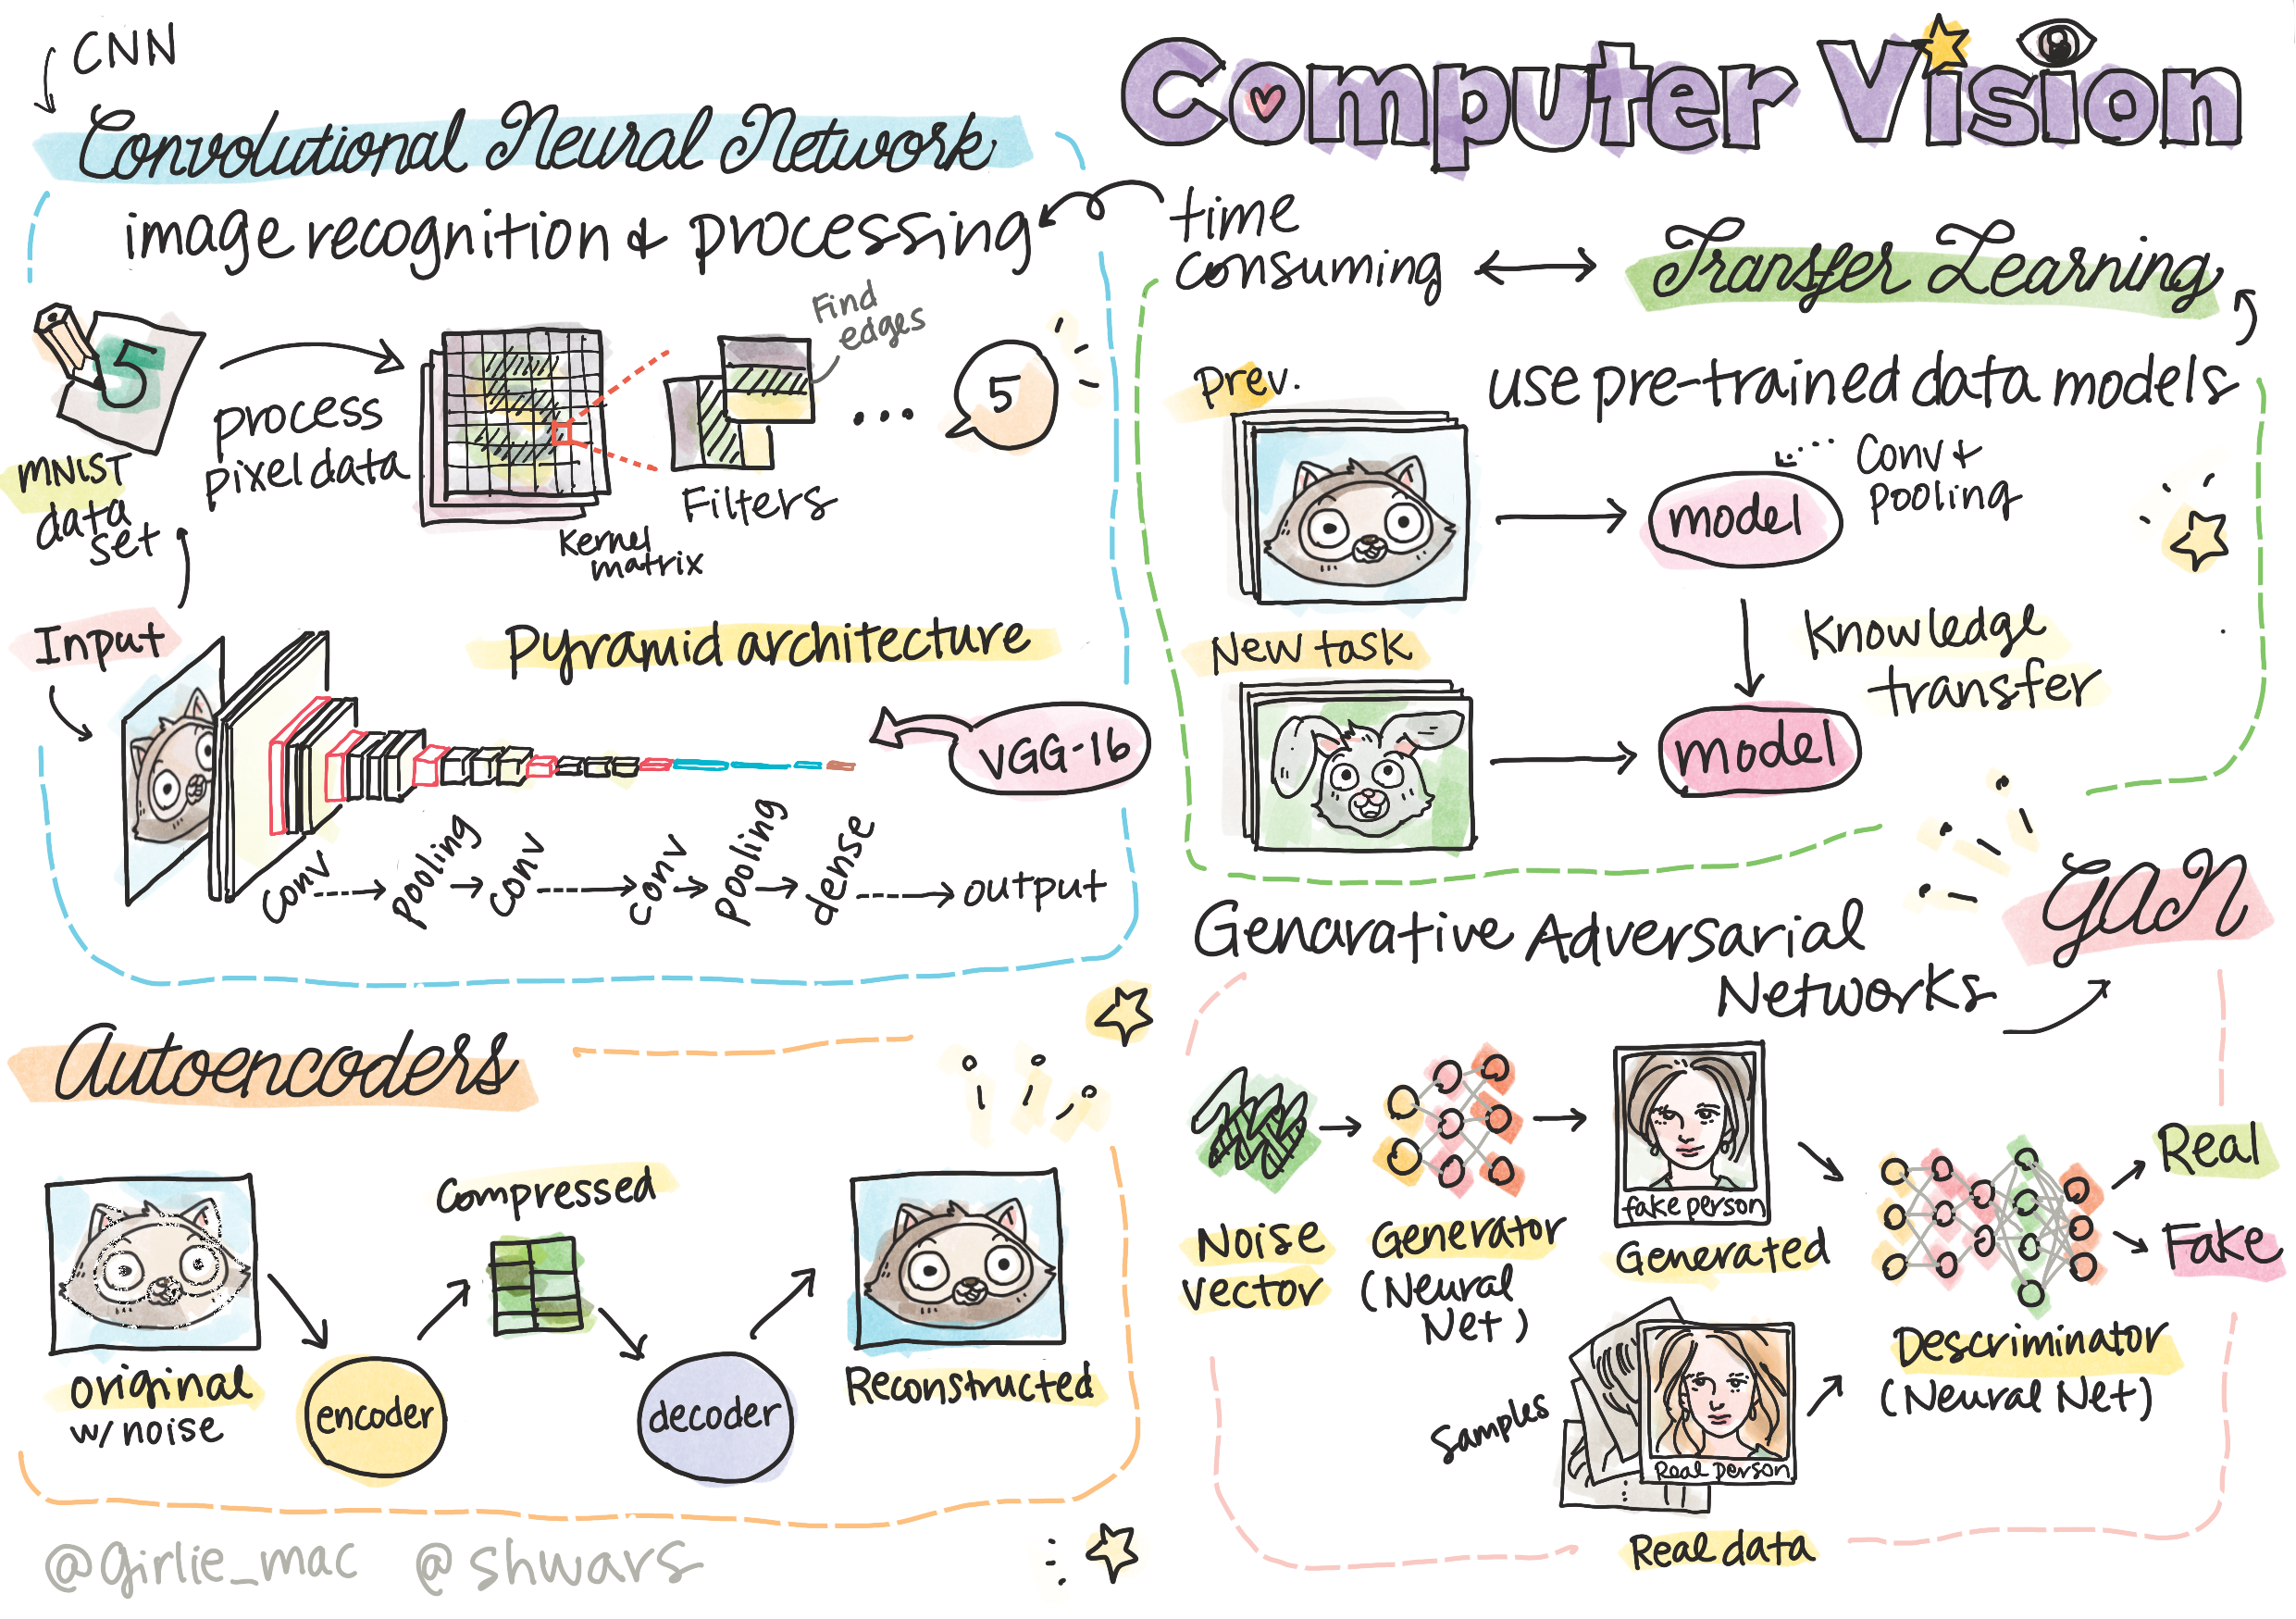


**Importancia de OpenCV :**OpenCV es una biblioteca de código abierto ampliamente utilizada en el procesamiento de imágenes y la visión por computadora. Su importancia radica en que ofrece una amplia variedad de herramientas y algoritmos para procesar imágenes en diferentes contextos y aplicaciones, desde la detección de objetos y reconocimiento facial hasta la visión de máquina y la robótica. Además, OpenCV es multiplataforma y es compatible con varios lenguajes de programación, lo que la hace accesible y fácil de integrar en diferentes proyectos y aplicaciones. En resumen, OpenCV es una herramienta fundamental para desarrolladores e investigadores que trabajan en el campo del procesamiento de imágenes y la visión por computadora.


## Celdas generales y funciones

In [ ]:
# Imports
import cv2  # Biblioteca OpenCV para procesamiento de imágenes
import numpy as np  # Biblioteca para computación científica en Python
import urllib.request  # Módulo para abrir URLs
import matplotlib.pyplot as plt  # Biblioteca para graficar datos
from google.colab.patches import cv2_imshow  # Función para mostrar imágenes en Colab debido a que formato cv2.show no esta disponible

# Esta línea permite graficar imágenes estáticas en el Notebook de Jupyter
%matplotlib inline


In [ ]:
#Leer la imagen con OpenCV
def readNormal(img):
  """
  Lee una imagen en formato BGR utilizando OpenCV.

  Args:
    img (str): la ruta de la imagen a leer.

  Returns:
    np.ndarray: un objeto NumPy que representa la imagen.
  """
  im = cv2.imread(img, cv2.IMREAD_COLOR)
  return im

def readRGB(img):
  """
  Lee una imagen en formato RGB utilizando OpenCV.

  Args:
    img (str): la ruta de la imagen a leer.

  Returns:
    np.ndarray: un objeto NumPy que representa la imagen en formato RGB.
  """
  im = cv2.imread(img, cv2.IMREAD_COLOR)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  return im


## Detección de color: flor azul


Se define un rango para dejar pasar colores, luego hayamos contornos y se dibuja un círculo alrededor de las flores.


Imagen con contorno



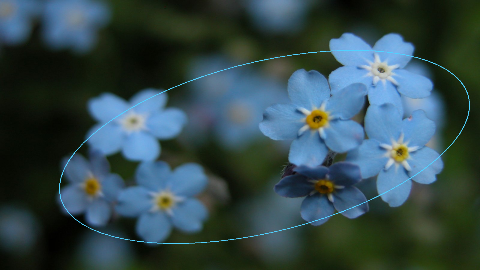



Máscara de la imagen



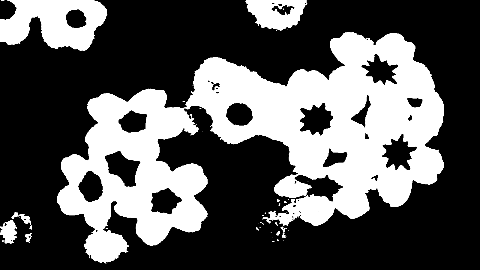

In [ ]:
def mascara1(im):
    # Crear arreglo con los valores más precisos de HSV para mejorar la detección. El color azul se obtiene testeando.
    lower_blue = np.array([97, 87, 45])
    """Los valores de lower_blue son [97, 87, 45] porque se han obtenido de manera empírica mediante pruebas.
     En general, al trabajar con detección de objetos o segmentación de imágenes, se utilizan pruebas para determinar los valores óptimos
      de los parámetros para obtener los resultados deseados.
      En este caso, se está utilizando un espacio de color HSV (Matiz, Saturación, Valor) para realizar la detección de color.
       El primer valor, el Matiz, se encuentra en un rango de 0 a 179, y representa los colores del espectro. Los otros dos valores, 
       Saturación y Valor, se encuentran en un rango de 0 a 255, y representan la intensidad del color."""

    upper_blue = np.array([123, 220, 255])
    # Crear máscara que resalte los píxeles que están dentro del rango de color definido.
    mask = cv2.inRange(im, lower_blue, upper_blue)
    """"El primer parámetro im en cv2.inRange(im, lower_blue, upper_blue) se refiere a la imagen de entrada en la que se desea aplicar la máscara.
     En este caso, se supone que la imagen de entrada ya ha sido leída y almacenada en la variable im. La función cv2.inRange() compara cada píxel de 
     la imagen de entrada con el rango especificado de valores de color y genera una imagen de salida llamada "máscara", donde los píxeles que cumplen
      con la condición de rango se marcan como blancos y los que no se cumplen se marcan como negros.
      
    En la función cv2.inRange(), el segundo y tercer parámetro especifican el rango de colores que se desea detectar en la imagen.
    En este caso, se está buscando detectar el color azul en una imagen. Para ello, se ha definido un rango de valores de color 
    en el espacio HSV (Hue, Saturation, Value) que corresponden al color azul. Los valores de este rango se han determinado empíricamente mediante pruebas y ajustes.
    El valor de lower_blue = np.array([97, 87, 45]) corresponde al valor más bajo del rango de colores que se desean detectar, mientras que 
    el valor de upper_blue = np.array([123, 220, 255]) corresponde al valor más alto del rango de colores que se desean detectar.
     Con estos valores de rango se filtra la imagen original para obtener una máscara que resalta los píxeles que están dentro del rango de colores especificado.
      """
    return (lower_blue, upper_blue)

# Obtener imagen de prueba desde una URL.
req = urllib.request.urlopen('https://i.ibb.co/cY7CThz/flor-azul.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
imagenflor = cv2.imdecode(arr, -1)
"""req = urllib.request.urlopen('https://i.ibb.co/cY7CThz/flor-azul.jpg'): Esta línea utiliza la librería urllib para abrir una conexión a la URL 
que contiene la imagen que se desea descargar. En este caso, la URL apunta a una imagen de una flor azul. La variable req se asigna al objeto de la conexión de la URL.
arr = np.asarray(bytearray(req.read()), dtype=np.uint8): urllib devuelve el contenido de la imagen en bytes, que se almacena en un objeto de bytes. 
La función bytearray() convierte ese objeto de bytes en un arreglo de bytes modificable. Luego, np.asarray() convierte ese arreglo de bytes en un arreglo NumPy de tipo de datos uint8. 
El arreglo de uint8 se asigna a la variable arr.
imagenflor = cv2.imdecode(arr, -1): Finalmente, la función cv2.imdecode() decodifica el arreglo arr en una imagen que se almacena en la variable imagenflor. 
El parámetro -1 especifica que se deben decodificar todas las bandas de la imagen, incluidas las transparencias (si las hay)"""
# Convertir a HSV la imagen y guardarla en una variable
hsv = cv2.cvtColor(imagenflor, cv2.COLOR_BGR2HSV)

# Aplicar un blur gaussiano a la variable hsv para mejorar la precisión
hsv = cv2.GaussianBlur(hsv, (9, 9), 0)

# Creamos un arreglo para obtener el lower_blue y upper_blue de la función máscara
[lr1, ur1] = mascara1(hsv)

# Creamos la máscara en este rango creado anteriormente
mask = cv2.inRange(hsv, lr1, ur1)

""""hsv convierte la imagen en formato BGR (Blue-Green-Red) a formato HSV (Hue-Saturation-Value) y la guarda en una variable llamada hsv. Esto se hace porque el 
formato HSV es más adecuado para trabajar con el color.
La segunda línea aplica un filtro Gaussiano a la variable hsv para suavizar la imagen y mejorar la precisión de la máscara.
En la tercera línea, se llama a la función mascara1 para obtener los valores de rango de color lower_blue y upper_blue, que se utilizan
 en la cuarta línea para crear una máscara para el rango de color azul. La máscara resultante se almacena en la variable mask."""

# Creamos los contornos y la jerarquía con la función findContours de CV2
contornos1, jerarquia1 = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
"""En esta línea, se utilizó la función cv2.findContours para encontrar los contornos de los objetos en la imagen umbralizada thresh. La función toma tres argumentos:
mask: la imagen umbralizada.
cv2.RETR_EXTERNAL: el modo de recuperación de contorno, que indica que solo se devolverán los contornos externos.
cv2.CHAIN_APPROX_SIMPLE: el método de aproximación de contorno, que reduce el número de puntos en el contorno.
La función devuelve dos valores:
contornos1: una lista de contornos, donde cada contorno es una matriz de coordenadas (x, y) que forman el contorno.
jerarquia1: una matriz que representa la relación jerárquica entre los contornos."""

# Encontramos el área para posteriormente escoger la de mayor tamaño
areas1 = [cv2.contourArea(c) for c in contornos1]
"""En esta línea, se utilizó la función cv2.contourArea para calcular el área de cada contorno en la lista contornos1. La función toma un solo argumento:
c: un contorno.
La función devuelve el área del contorno."""

# Obtiene el índice máximo de areas1 para mejorar precisión en el reconocimiento
max_index1 = np.argmax(areas1)


# Asignamos el contorno al área más grande con ese color identificada en el video
cnt1 = contornos1[max_index1]
"""En estas líneas, se utilizó la función np.argmax de Numpy para obtener el índice del contorno con el área más grande en la lista areas1. La función toma un solo argumento:
areas1: una lista de áreas de contorno.
La función devuelve el índice del elemento máximo en la lista.
Luego, se asigna el contorno con el área más grande a una variable cnt1."""



# Creamos una elipse en el contorno asignado anteriormente
elipse1 = cv2.fitEllipse(cnt1)

# Creamos la elipse usando la información anterior para ubicarla en el lugar correcto
cv2.ellipse(imagenflor, elipse1, (255, 209, 81), 2)
"""En estas líneas, se utilizó la función cv2.fitEllipse para ajustar una elipse alrededor del contorno cnt1. La función toma un solo argumento:
cnt1: el contorno.
La función devuelve los parámetros de la elipse.
Luego, se utilizó la función cv2.ellipse para dibujar la elipse en la imagen original imagen. La función toma cuatro argumentos:
imagen: la imagen donde se dibujará la elipse.
elipse1: los parámetros de la elipse.
(255, 209, 81): el color de la elipse en formato BGR.
2: el grosor de la línea de la elipse"""

#Creamos el resultado usando CV2 con la elipse dentro de la imagen
result1 = cv2.bitwise_and(imagenflor, imagenflor, mask=mask)

#Ajustar el tamaño de las imágenes para visualizarlas de manera más cómoda
imagenflorsmall = cv2.resize(imagenflor, (480, 270)) 
masksmall = cv2.resize(mask, (480, 270)) 
""""se utilizó la función cv2.bitwise_and para aplicar la máscara mask a la imagen original imagen. La función toma tres argumentos:
imagen: la imagen original.
imagen: la imagen donde se aplicará la máscara.
mask=mask: la máscara a aplicar.


 La función toma resize dos argumentos:
imagen: la imagen a redimensionar.
(480, 270): el tamaño deseado de la imagen.
Luego, se utilizaron las funciones cv2_imshow y print para mostrar las imágenes en pantalla junto con los mensajes de texto correspondientes.

"""

#Mostramos las imágenes resultantes
print('\nImagen con contorno\n')
cv2_imshow(imagenflorsmall)
print('\n\nMáscara de la imagen\n')
cv2_imshow(masksmall)





## Thresholding a imágenes para distinguir el fondo del frente de la imagen

● Hallamos el histograma de la imagen

● Escojemos el umbral con el que va a realizar el proceso

● Aplicamos un tipo de thresholding.

● Pintamos los píxeles pertenecientes al background de azul

● Graficamos la imagen original en un mismo subplot junto a la imagen con el fondo ahora de color azul

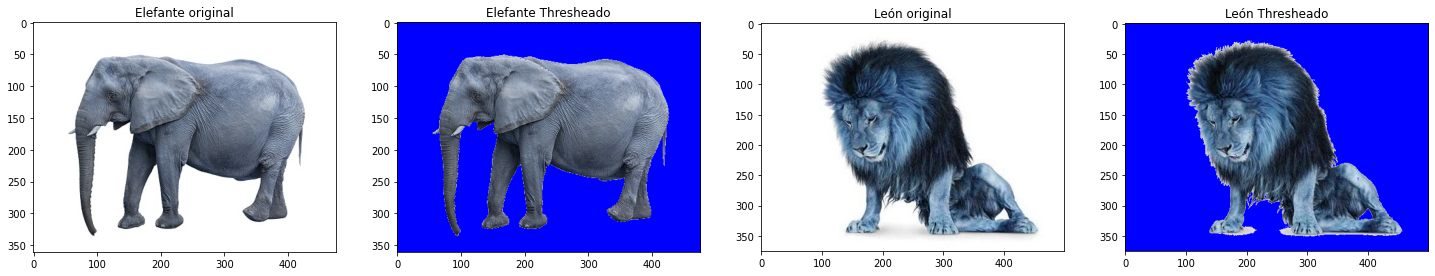

In [ ]:
import urllib.request
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Importamos las imágenes a utilizar

req = urllib.request.urlopen('https://i.ibb.co/tpqqkc0/elefante.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
elefante = cv2.imdecode(arr, -1) # 'Load it as it is'

req = urllib.request.urlopen('https://i.ibb.co/BLsT3Fg/leon.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
leon = cv2.imdecode(arr, -1) # 'Load it as it is'

# Leemos la imagen en gris para luego sacar su histograma teniendo en cuenta que se trata de Thresholding
grayElefante = cv2.cvtColor(elefante, cv2.COLOR_BGR2GRAY)
grayLeon = cv2.cvtColor(leon, cv2.COLOR_BGR2GRAY)

# Sacamos el histograma de ambas imágenes a través de la función calcHist de CV2
histElefante = cv2.calcHist([grayElefante], [0], None, [256], [0,256])
histLeon = cv2.calcHist([grayLeon], [0], None, [256], [0,256])

# Hacemos Thresholding de tipo binario inverso. Código de threshold sacado y analizado de:
# https://learnopencv.com/opencv-threshold-python-cpp/#:~:text=Inverse-Binary%20Thresholding%20(%20THRESH_BINARY_INV%20),is%20less%20than%20the%20threshold
# Con base a los valores del histograma, vemos la tendencia donde existe el cambio y se puede definir el rango a aplicar en el Threshold   
# Se escogió entonces un rango de 225 a 255, agarrando colores cercanos que puedan existir y ser imperceptibles a diferencias en el ojo humano
var1, thresElefante = cv2.threshold(grayElefante, 225, 255, cv2.THRESH_BINARY_INV)
var2, thresLeon = cv2.threshold(grayLeon, 225, 255, cv2.THRESH_BINARY_INV)

#Creamos una máscara usando el resultante del Thresholding pintando el fondo de azul como se solicita en el ejercicio
finalElefante = elefante.copy()
finalElefante[thresElefante==0] = (0,0,255) #Azul
finalLeon = leon.copy()
finalLeon[thresLeon==0] = (0,0,255) #Azul

#Función para graficar en un solo subplot de manera dinámica todas las imágenes en un arreglo (gracias profe)
def plot_img(images, titles):
  fig, axs = plt.subplots(nrows = 1, ncols = len(images), figsize = (25, 25))
  for i, p in enumerate(images):
    axs[i].imshow(p, 'gray')
    axs[i].set_title(titles[i])
  plt.show()

imagenes = [elefante, finalElefante, leon, finalLeon]
titulos = ['Elefante original', 'Elefante Thresheado', 'León original', 'León Thresheado']

plot_img(imagenes, titulos)

#**Preguntas y Respuestas del Foro**

# STEVEN TRIVINO AREVALO 


*    ***¿Puedo procesar imágenes en tiempo real con OpenCV?***  

¡Por supuesto que es viable procesar imágenes en tiempo real con OpenCV! OpenCV es una biblioteca de código abierto diseñada específicamente para el procesamiento de imágenes y la visión por computadora. Su robusta implementación la hace adecuada para aplicaciones en tiempo real, lo que se logra gracias a la eficiencia y velocidad de sus algoritmos y herramientas.

La función cv2.VideoCapture() permite la captura en tiempo real de imágenes de una cámara, lo que puede ser procesado con las funciones de procesamiento de imágenes que ofrece OpenCV, entre las que se destacan la detección de bordes, la segmentación y el reconocimiento de objetos. A su vez, se pueden optimizar los recursos y utilizar técnicas de procesamiento en paralelo para lograr un procesamiento de imágenes en tiempo real óptimo.

Por lo tanto, si buscas una solución para procesar imágenes en tiempo real, OpenCV es una excelente opción que ofrece un amplio conjunto de herramientas y funcionalidades que se ajustan a tus necesidades.

# JHON EDINSON CAICEDO LOAIZA 

* ***¿Como puedo convertir una imagen a escala de grises con la libreria openCv, pero conservando los canales RGB?***

Convertir una imagen a escala de grises con OpenCV manteniendo los canales RGB, puedes utilizar la función cv2.cvtColor() de la siguiente manera




In [ ]:
import cv2

# Lee la imagen
img = cv2.imread('ruta_de_tu_imagen.jpg')

# Convierte la imagen a escala de grises manteniendo los canales RGB
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
rgb_img = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB)

"""
La función cv2.cvtColor() se utiliza para cambiar el espacio de color de una imagen. 
En este caso, se convierte la imagen a escala de grises con cv2.COLOR_RGB2GRAY. 
Luego, se convierte la imagen a color RGB nuevamente con cv2.COLOR_GRAY2RGB para mantener 
los canales RGB. Finalmente, se guarda la imagen en rgb_img.
"""


error: ignored

# MIGUEL ANGEL ACEVEDO DELGADO 

* ***¿Qué parametros se deben tener en cuenta al querer diseñar un modelo para la detección de objetos en video con OpenCV?***

Si se utiliza la biblioteca OpenCV para diseñar un modelo de detección de objetos en video, hay varios parámetros adicionales que se deben tener en cuenta, incluyendo:

Selección del clasificador: OpenCV proporciona varios clasificadores pre-entrenados para la detección de objetos, como el clasificador Haar y el clasificador Cascade. También es posible entrenar su propio clasificador utilizando herramientas como el entrenador de cascada de OpenCV.

Configuración del clasificador: Dependiendo del clasificador seleccionado, es posible que deba configurar parámetros específicos, como la escala de imagen y el tamaño de ventana, para optimizar el rendimiento del modelo.

Configuración de detección en tiempo real: Si se desea realizar la detección de objetos en tiempo real, es importante optimizar el rendimiento del modelo para reducir la latencia. Esto puede incluir la implementación de técnicas como la extracción de características en paralelo y la reducción de la resolución de la imagen de entrada.

Selección de la función de distancia: Si se utiliza una técnica de aprendizaje automático, como la detección basada en redes neuronales, es importante seleccionar una función de distancia adecuada para medir la similitud entre las características extraídas y las características del objeto de interés.

Validación del modelo: Es importante validar el modelo utilizando un conjunto de datos de prueba para determinar la precisión y el rendimiento del modelo. Esto puede incluir la medición de la precisión, la velocidad de detección y la tasa de falsos positivos.

Optimización del modelo: Si el modelo no está produciendo los resultados deseados, es posible que deba ajustar la configuración del modelo, la selección de características o los parámetros de entrenamiento para mejorar su precisión

# JUAN STIVEN MOLINA GRAJALES

* ***¿Existe alguna función que permita fusionar imágenes con openCV? En caso de que haya ¿cuál sería? y ¿Qué sucedería con la intensidad de los pixeles de cada imagen?***

OpenCV proporciona una función llamada cv2.addWeighted() que permite fusionar imágenes. Esta función combina dos imágenes con un factor de ponderación especificado para cada una, lo que permite controlar la cantidad de influencia que tiene cada imagen en el resultado final.

La sintaxis de la función cv2.addWeighted() es la siguiente:
```
dst = cv2.addWeighted(img1, alpha, img2, beta, gamma)

```
donde img1 y img2 son las dos imágenes que se desean fusionar, alpha y beta son los factores de ponderación para cada imagen y gamma es un parámetro que se utiliza para controlar la intensidad del resultado final.

La función cv2.addWeighted() realiza una operación de mezcla ponderada en los valores de píxeles de las dos imágenes de entrada, multiplicando cada píxel por su factor de ponderación correspondiente y luego sumando los resultados. Esto permite combinar las dos imágenes de una manera controlada.

La intensidad de los píxeles en la imagen resultante dependerá de los valores de ponderación utilizados para cada imagen. Si el valor de ponderación es alto para una imagen y bajo para la otra, la influencia de la primera imagen será mayor en el resultado final. Si ambos valores de ponderación son iguales, las dos imágenes tendrán la misma influencia en el resultado final. Es importante tener en cuenta que si los valores de ponderación son demasiado altos, los píxeles de la imagen resultante pueden saturarse y aparecer blancos o negros puros.




# JHONNATTAN ANDRES BOTERO VALDERRAMA 

* ***Sera posible usarse para solucionar un laberinto en realidad aumentada?, por ejemplo, que se tome una foto del esquema del laberinto y que se auto-resuelva?***

es posible utilizar OpenCV para resolver laberintos en realidad aumentada. Para ello, se puede utilizar técnicas de procesamiento de imágenes para detectar el laberinto en la imagen y luego aplicar algoritmos de resolución de laberintos para encontrar la solución. A continuación se describen algunos pasos generales que se pueden seguir para lograr esto:

Leer la imagen del laberinto: La primera tarea es leer la imagen del laberinto desde la cámara o desde un archivo de imagen. OpenCV tiene funciones integradas para leer y procesar imágenes.

Preprocesar la imagen: La imagen del laberinto puede contener ruido o distorsiones que podrían dificultar la detección de la solución del laberinto. Para solucionar esto, se puede aplicar técnicas de procesamiento de imágenes, como la suavización, la corrección de color, la segmentación y el umbralizado, para mejorar la calidad de la imagen.

Detectar las paredes del laberinto: Una vez que la imagen se ha preprocesado, se puede detectar las paredes del laberinto utilizando algoritmos de detección de bordes o de segmentación. La detección de bordes se utiliza para detectar bordes y líneas rectas en la imagen, mientras que la segmentación se utiliza para separar las partes de la imagen que contienen información relevante del laberinto.

Crear una representación interna del laberinto: Después de detectar las paredes del laberinto, se puede crear una representación interna del laberinto en forma de grafo. Cada celda del laberinto se convierte en un nodo en el grafo y las paredes del laberinto se convierten en bordes.

Resolver el laberinto: Una vez que se ha creado la representación interna del laberinto, se puede utilizar un algoritmo de resolución de laberintos, como el algoritmo de búsqueda en profundidad o el algoritmo de búsqueda en anchura, para encontrar la solución del laberinto.

Mostrar la solución en la realidad aumentada: Una vez que se ha encontrado la solución del laberinto, se puede mostrar la solución en la realidad aumentada utilizando técnicas de superposición de imágenes.

Tenga en cuenta que esto es solo un enfoque general y hay muchos detalles y técnicas específicas que se deben tener en cuenta para resolver un laberinto en realidad aumentada de manera efectiva.

# NELSON ANDRES DELGADO MACHADO



*   **En caso de querer trabajar con un video por ejemplo para el caso de detección de movimiento, ¿qué parámetros debería utilizar de cv2 para importar mi video y que debería utilizar si quiero restarle al frame actual el frame anterior para detectar un cambio?**


Para trabajar con un video en OpenCV, puedes utilizar la clase cv2.VideoCapture. Puedes especificar la ruta del archivo de video como argumento de entrada para cargarlo en el programa.

Una vez que hayas cargado el video, puedes utilizar el método read() para leer cada cuadro del video en un bucle y procesarlos. La función read() devuelve dos valores: el cuadro actual del video y un indicador de éxito que indica si se pudo leer el cuadro correctamente.

Para restar el marco actual del marco anterior y detectar cambios, puedes seguir los siguientes pasos:

Lee el primer cuadro del video utilizando el método read() y guárdalo en una variable.

En un bucle, utiliza el método read() para leer cada cuadro del video.

Si la lectura del cuadro es exitosa, resta el cuadro actual del cuadro anterior utilizando la función cv2.absdiff().

Convierte la imagen resultante en escala de grises utilizando la función cv2.cvtColor().

Aplica un umbral a la imagen resultante utilizando la función cv2.threshold() para binarizarla y eliminar el ruido.

Encuentra los contornos de los objetos en la imagen binarizada utilizando la función cv2.findContours()..

# JORGE LUIS GUECHE MANQUILLO



*   **¿Cómo puedo entrenar un modelo de aprendizaje automático para realizar una tarea específica utilizando OpenCV?**


Es un proceso similar a la construcción de cualquier otro modelo de ML, tienes que preparar datos (imágenes, videos) extraer las características deseadas, entrenar el modelo, evaluarlo, etc. Para cada uno de estos procesos opencv ofrece una gama de herramientas, por ejemplo si estás en la fase de entrenamiento OpenCV ofrece una amplia gama de algoritmos de aprendizaje automático, como SVM, Naive Bayes, Random Forest, y Redes Neuronales, entre otros y así mismo con cada una de las etapas de workflow de desarrollo de un modelo de ML

# EDGAR FERNANDO PAREDES BANGUERO



*   **Que otras funciones de umbralización se pueden usar aparte de cv.threshold y que consideraciones se deben tener para utilizarlas?**



Edgar, OpenCV ofrece varias funciones de umbralización además de la función cv.threshold. Te voy a mostrar algunas de las funciones de umbralización más comunes en OpenCV:

cv.adaptiveThreshold: Esta función calcula el umbral de cada píxel en función de un tamaño de ventana especificado y de la media de los valores de intensidad de los píxeles dentro de la ventana. Esta técnica se usa a menudo cuando el contraste de la imagen es bajo o variable.

cv.threshold2: Esta función es similar a cv.threshold, pero permite especificar diferentes valores de umbral para los valores de píxel por encima y por debajo del umbral.

cv.inRange: Esta función se utiliza para crear una máscara binaria que indica qué píxeles de una imagen están dentro de un rango de valores. Es útil para segmentar objetos de interés en una imagen.

Al utilizar estas funciones de umbralización, se deben tener en cuenta varias consideraciones:

La elección del umbral es importante y puede afectar significativamente el resultado final. Por lo tanto, es importante experimentar con diferentes valores de umbral para encontrar el valor óptimo.

En algunas situaciones, el umbral puede ser variable o no ser fijo. En estos casos, la función cv.adaptiveThreshold puede ser una buena opción.

La función cv.inRange es útil para segmentar objetos de interés en una imagen, pero puede ser sensible a la iluminación y a la variación de color. Por lo tanto, es importante ajustar adecuadamente los rangos de color para obtener el mejor resultado posible.


##HARDY GALVIS PEDRAZA

*    ***¿Existe alguna forma con OpenCV de realizar máscaras en automático para algún proceso de segmentación o clasificación?***  

Sí, existen varias técnicas de segmentación y clasificación de imágenes en OpenCV que permiten generar máscaras automáticamente. Algunas de estas técnicas incluyen:

Umbralización adaptativa: Esta técnica es útil cuando las condiciones de iluminación varían en la imagen. En lugar de aplicar un umbral fijo a toda la imagen, se utiliza un umbral adaptativo que varía según la región de la imagen. OpenCV tiene una función "cv2.adaptiveThreshold()" que realiza este proceso.

Segmentación por detección de bordes: Esta técnica se basa en detectar los bordes de los objetos en la imagen. OpenCV tiene varias funciones para detección de bordes, como "cv2.Canny()" y "cv2.Sobel()".

Segmentación por agrupamiento de píxeles: Esta técnica agrupa los píxeles de la imagen en regiones homogéneas. OpenCV tiene una función "cv2.kmeans()" para realizar este proceso.

Segmentación por detección de contornos: Esta técnica detecta los contornos de los objetos en la imagen. OpenCV tiene varias funciones para detección de contornos, como "cv2.findContours()" y "cv2.drawContours()".

Estas técnicas pueden combinarse y ajustarse según las necesidades específicas del proyecto. Con ellas, es posible generar máscaras automáticamente para procesos de segmentación y clasificación de imágenes en OpenCV.

### A continuación, te mostramos un código de ejemplo:

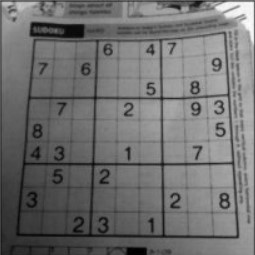

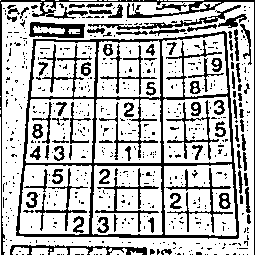

In [ ]:
import cv2

req = urllib.request.urlopen('https://i.ibb.co/k3vyQZP/ejemplo.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
sudoku = cv2.imdecode(arr, -1) # 'Load it as it is'
# Leer imagen en escala de grises
imgnormal = cv2.cvtColor(sudoku, cv2.COLOR_BGR2GRAY)

# Aplicar umbralización adaptativa
thresh = cv2.adaptiveThreshold(imgnormal, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Mostrar imagen umbralizada
cv2_imshow(imgnormal)
cv2_imshow(thresh)

#Para conocer más sobre esta y otras funcones de Threshold, visita la fuente de esta respuesta:
#https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

# LEONARDO FABIO GRISALES HURTADO

*    ***¿Es necesario realizar la importación de os para el funcionamiento del cuaderno? veo que es lo primero que se importa pero no logro diferenciar en qué parte del código es utilizado***

Cordial saludo compañero, analizando el cuaderno y sus funciones, llegamos a la conclusión de que utilizar la librería "os" no es necesario para este cuaderno, y en general, no es necesario importar el módulo "os" para utilizar las funciones de OpenCV.

El módulo "os" es una librería de Python que proporciona una forma de interactuar con el sistema operativo en el que se está ejecutando el código. Esta librería permite realizar operaciones comunes en el sistema operativo, como crear, leer, escribir y eliminar archivos, así como interactuar con el entorno y las variables de sistema. Algunas funciones:

os.getcwd(): Obtiene el directorio de trabajo actual.
os.listdir(): Lista los archivos y carpetas en un directorio.
os.mkdir(): Crea un directorio.
os.rmdir(): Elimina un directorio.
os.path.join(): Concatena rutas de archivo de manera segura, independientemente del sistema operativo en el que se esté ejecutando el código.

El módulo "os" de Python es útil en un proyecto que involucre OpenCV para realizar operaciones relacionadas con el sistema de archivos, como leer y escribir archivos de imágenes, listar los archivos en un directorio, crear directorios, entre otras. En un cuaderno con OpenCV, se puede utilizar el módulo "os" para leer y escribir imágenes, verificar la existencia de archivos y directorios, y realizar otras tareas comunes relacionadas con el sistema de archivos. En este caso, no fue necesario, pues todo el manejo relacionado a las imágenes lo hacemos en línea y no requerimos de guardarlas en un directorio.

#BRAYAM ANDRES SAAVEDRA ARCE

* ***¿En que consiste la técnica de thresholding utilizada en el ejercicio de las flores? ¿ O qué otras mascaras hay disponibles para realizar este proceso con OpenCV?***

Cordial saludo compañero. En el caso del ejercicio de las flores, no se utilizó thresholding como tal, sino que se tuvo un enfoque de mascarizar para segmentar colores. Te explicaré entonces las distintas máscaras disponibles para este proceso.

Existen varias técnicas de segmentación de imágenes en OpenCV que permiten generar máscaras automáticamente. Algunas de estas técnicas incluyen:

Umbralización adaptativa: Esta técnica es útil cuando las condiciones de iluminación varían en la imagen. En lugar de aplicar un umbral fijo a toda la imagen, se utiliza un umbral adaptativo que varía según la región de la imagen. OpenCV tiene una función "cv2.adaptiveThreshold()" que realiza este proceso.

Segmentación por detección de bordes: Esta técnica se basa en detectar los bordes de los objetos en la imagen. OpenCV tiene varias funciones para detección de bordes, como "cv2.Canny()" y "cv2.Sobel()".

Segmentación por agrupamiento de píxeles: Esta técnica agrupa los píxeles de la imagen en regiones homogéneas. OpenCV tiene una función "cv2.kmeans()" para realizar este proceso.

Segmentación por detección de contornos: Esta técnica detecta los contornos de los objetos en la imagen. OpenCV tiene varias funciones para detección de contornos, como "cv2.findContours()" y "cv2.drawContours()".

Estas técnicas pueden combinarse y ajustarse según las necesidades específicas del proyecto.

### Este código sirve como ejemplo para que visualices el proceso:

In [ ]:
import cv2

req = urllib.request.urlopen('https://i.ibb.co/k3vyQZP/ejemplo.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
sudoku = cv2.imdecode(arr, -1) # 'Load it as it is'
# Leer imagen en escala de grises
imgnormal = cv2.cvtColor(sudoku, cv2.COLOR_BGR2GRAY)

# Aplicar umbralización adaptativa
thresh = cv2.adaptiveThreshold(imgnormal, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Mostrar imagen umbralizada
cv2_imshow(imgnormal)
cv2_imshow(thresh)

#Para conocer más sobre esta y otras funcones de Threshold, visita la fuente de esta respuesta:
#https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

#ENRIQUE CHRISTENSEN BETANCOURT

* ***Con la linea: video= cv2.VideoCapture(0) es posible acceder a la cámara del computador si se está ejecutando de manera local. ¿Es posible capturar la cámara con openCV cuando se está ejecutando el programa en la nube? Si es así, ¿cómo?***

Cordial saludo compañero, efectivamente con la función de cv2.VideoCapture(0) es posible acceder a la cámara del computador en entorno local.
En cuanto a tu preguta, sí, es posible acceder a la cámara del ordenador y capturar imágenes en tiempo real utilizando OpenCV en la nube, siempre y cuando la plataforma en la nube permita el acceso a la cámara. Por ejemplo, Google Colab no permite el acceso directo a la cámara web. Sin embargo, existen servicios de nube como AWS o Azure que proporcionan instancias que tienen acceso a la cámara.

En este caso, la dependencia no está ligada al código como tal, sino a los permisos propios del programa en la nube para acceder a tu cámara.

#JEICSON ANDRES ZUNIGA OLMOS

* ***No me queda claro que hace esta función, el valor de mask que función cumple sino es retornado.***


```
def mascara1(im):
    lower_blue = np.array([97, 87, 45])
    upper_blue = np.array([123, 220, 255])
    mask = cv2.inRange(im, lower_blue, upper_blue)
```

La función mascara1 se utiliza para crear una máscara que resalta los píxeles de una imagen que tienen un rango de color específico. En este caso, la función está diseñada para detectar el color azul en una imagen utilizando el espacio de color HSV.

La función recibe como entrada una imagen im y crea un arreglo lower_blue con los valores más precisos de HSV para mejorar la detección del color azul. Luego, se crea otro arreglo upper_blue con los valores más altos del rango de colores que se desean detectar en la imagen.

A continuación, se utiliza la función cv2.inRange() para generar una máscara que resalta los píxeles que están dentro del rango de color definido. La máscara resultante se almacena en la variable mask, pero esta variable no se utiliza más adelante en la función y no se retorna.

Finalmente, la función retorna una tupla que contiene los arreglos lower_blue y upper_blue.

Aquí se describe de manera más directa:
```
def mascara1(im):
    # Crear arreglo con los valores más precisos de HSV para mejorar la detección. El color azul se obtiene testeando.
    lower_blue = np.array([97, 87, 45])
    """Los valores de lower_blue son [97, 87, 45] porque se han obtenido de manera empírica mediante pruebas.
     En general, al trabajar con detección de objetos o segmentación de imágenes, se utilizan pruebas para determinar los valores óptimos
      de los parámetros para obtener los resultados deseados.
      En este caso, se está utilizando un espacio de color HSV (Matiz, Saturación, Valor) para realizar la detección de color.
       El primer valor, el Matiz, se encuentra en un rango de 0 a 179, y representa los colores del espectro. Los otros dos valores, 
       Saturación y Valor, se encuentran en un rango de 0 a 255, y representan la intensidad del color."""

    upper_blue = np.array([123, 220, 255])
    # Crear máscara que resalte los píxeles que están dentro del rango de color definido.
    mask = cv2.inRange(im, lower_blue, upper_blue)
    """"El primer parámetro im en cv2.inRange(im, lower_blue, upper_blue) se refiere a la imagen de entrada en la que se desea aplicar la máscara.
     En este caso, se supone que la imagen de entrada ya ha sido leída y almacenada en la variable im. La función cv2.inRange() compara cada píxel de 
     la imagen de entrada con el rango especificado de valores de color y genera una imagen de salida llamada "máscara", donde los píxeles que cumplen
      con la condición de rango se marcan como blancos y los que no se cumplen se marcan como negros.
      
    En la función cv2.inRange(), el segundo y tercer parámetro especifican el rango de colores que se desea detectar en la imagen.
    En este caso, se está buscando detectar el color azul en una imagen. Para ello, se ha definido un rango de valores de color 
    en el espacio HSV (Hue, Saturation, Value) que corresponden al color azul. Los valores de este rango se han determinado empíricamente mediante pruebas y ajustes.
    El valor de lower_blue = np.array([97, 87, 45]) corresponde al valor más bajo del rango de colores que se desean detectar, mientras que 
    el valor de upper_blue = np.array([123, 220, 255]) corresponde al valor más alto del rango de colores que se desean detectar.
     Con estos valores de rango se filtra la imagen original para obtener una máscara que resalta los píxeles que están dentro del rango de colores especificado.
      """
    return (lower_blue, upper_blue)
```

En cuanto a tu duda sobre el objetivo de la variable "mask", más abajo de esas líneas de código se aplica y se explica:



```
#Creamos el resultado usando CV2 con la elipse dentro de la imagen
result1 = cv2.bitwise_and(imagenflor, imagenflor, mask=mask)

#Ajustar el tamaño de las imágenes para visualizarlas de manera más cómoda
imagenflorsmall = cv2.resize(imagenflor, (480, 270)) 
masksmall = cv2.resize(mask, (480, 270)) 
""""se utilizó la función cv2.bitwise_and para aplicar la máscara mask a la imagen original imagen. La función toma tres argumentos:
imagen: la imagen original.
imagen: la imagen donde se aplicará la máscara.
mask=mask: la máscara a aplicar.
```






#JUAN MANUEL TRUJILLO CORREA



*   ***Para que se halla el histograma de las imágenes y como lo podemos visualizar por completo?***


Los histogramas nos ofrecen mucha más información de la que podemos apreciar con el ojo. Estos gráficos contienen datos sobre la cantidad de tonos negros, medios y blancos que hay en una fotografía, lo que puede ayudarnos a determinar si la foto está bien expuesta o no.

#GERMAN LOZANO 

*   ***¿Es posible entrenar un modelo que permita para efectos judiciales, que describa de una imagen cuantas personas y en que posición están, si tienen armas o si están uniformadas, si es un entorno urbano o rural?***


Hola, con base a todos los modelos de reconocimiento de imagenes podríamos decirte que sí es posible evaluar las condiciones que mencionas en una imagen o en un video, pero esto va depender de los datos que uses para entrenar y evaluar tu modelo.


#SEBASTIAN BETANCOURTH ZAPATA

*   ***Tengo entendido que existen varias formas de intalar openCV en python, que son pip install opencv-python y pip install opencv-contrib-python. ¿Cuál es la diferencia entre las dos formas de intastalación?***

Hola, Sebastián, tengo entendido que opencv-python es el paquete principal con los modulos que generalmente se usan pero opencv-contrib-python instala paquetes adicionales te dejo un enlace donde estan esos paquetes adicionales https://docs.opencv.org/4.x/d3/d81/tutorial_contrib_root.html. Adicionalmente tambien existe otros paquetes de instalación enfocado en server pip install opencv-python-headless

# CARLOS JULIO REYES LENIS 



*   **En el caso del fitEllipse() ¿Es posible usar otra función que se ajuste al entorno y cumpla con el objetivo principal que esta función realiza en el código?**



Hola, esta es una respuesta generada por CHAT GPT y corroborada por mi cuenta, básicamente explica todo, y si hay algo mas que decir, seria que, al igual que con una imagen, efectivamente es posible realizarlo también con un video...
"OpenCV cuenta con una amplia variedad de funciones para el procesamiento de imágenes y el análisis de objetos. Además de la función fitEllipse, existen otras funciones que puedes utilizar para analizar y detectar objetos en una imagen.

Aquí te presento algunas de las funciones de OpenCV que puedes utilizar para el análisis de objetos:

findContours: Esta función busca contornos en una imagen binaria. Los contornos son conjuntos de puntos conectados que forman la silueta de un objeto.

minEnclosingCircle: Esta función encuentra el círculo mínimo que encierra un conjunto de puntos. Puedes utilizar esta función para encontrar la posición y el tamaño de un objeto circular en una imagen.

minAreaRect: Esta función encuentra el rectángulo mínimo que encierra un conjunto de puntos. Puedes utilizar esta función para encontrar la posición y el tamaño de un objeto rectangular en una imagen.

HoughCircles: Esta función detecta círculos en una imagen utilizando la transformada de Hough circular. Puedes utilizar esta función para detectar círculos en una imagen y obtener su posición y radio.

HoughLines: Esta función detecta líneas en una imagen utilizando la transformada de Hough. Puedes utilizar esta función para detectar líneas en una imagen y obtener sus parámetros.

Estas son solo algunas de las funciones que puedes utilizar en OpenCV para el análisis de objetos. Puedes explorar la documentación de OpenCV para encontrar más funciones que se ajusten a tus necesidades específicas." Nos comenta CHAT GPT.

Adicionalmente te puedo dejar la documentación oficial de OpenCV donde explican todas las funciones similares a detalle. https://docs.opencv.org/3.4/dd/d49/tutorial_py_contour_features.html

Saludos.

# RONALD STIVEN BEJARANO LARRAHONDO



*   **¿Qué diferencias visuales puedo esperar en una imagen después de haber sido convertida de BGR a RGB utilizando la función cv2.cvtColor()?**

La función es un cambio de espacios de color estándar.

Ahora, respecto a BGR y RGB, empiezo comentando que una imagen a color se compone de "capas de colores principales" por decirlo así, aunque son mas formalmente llamados espacios de color, los cuales definen un rango de colores posibles al mezclarse para cada pixel de una imagen.

Ya explicado esto, entonces RGB, al igual que BGR, son espacios de color, y como es notable, estos cambian la ubicación del canal Rojo y Azul en los subpixeles. A nivel visual es difícil notar diferencias ya que son composiciones muy similares. Aunque para dar un ejemplo de diferencia, el portal: https://www.displayninja.com/rgb-vs-bgr-subpixel-layout/ nos dice que hay gran importancia en el tipo de monitor en el cual se visualice la imagen ya que "Los monitores con diseño BGR tienen una disposición de subpixeles inversa en comparación con la estructura de píxeles RGB estándar. Esto hace que el texto aparezca borroso en los monitores BGR (particularmente aquellos con baja densidad de píxeles) ya que Windows maneja el suavizado de subpixeles de acuerdo con el diseño RGB más común de manera predeterminada." dice el portal. El cual posteriormente concluye en que el texto pequeño es una de las pocas diferencias que se puede notar al comparar visualmente BGR y RGB.

Te recomiendo mirar el enlace para notar esto gráficamente.

# JESUS ANTONIO VALENCIA ESCOBAR



*   **Al definir los rangos para dejar pasar los colores que por defecto el OpenCV lee las imágenes en BGR, ¿Es posible usar otra función para la transformación del color en vez de HSV y tendrá la misma función?**



Si es posible, y se podría usar perfectamente BGR, que como mencionas, es el estándar con el cual se leen las imágenes. El espacio de color HSV (hue, saturation, value) se usa por comodidad, debido a que este espacio de color permite separar el color, de la saturación y el brillo. Generando así mayor facilidad para separar los rangos de colores que deseamos separar, y por tanto, aumentando la exactitud en el reconocimiento de objetos por rangos de colores, como lo hace con la flor en el caso que presentamos.

Te dejo un enlace para que puedas profundizar mas sobre este tema. https://omes-va.com/deteccion-de-colores/#:~:text=HSV%20(Hue%2C%20Saturation%2C%20Value)%20en%20OpenCV,-Figura%201%3A%20Espacio&text=Vamos%20a%20utilizar%20este%20espacio,los%20colores%20que%20deseamos%20detectar.

Saludos.

# JORGE ANDRES JARAMILLO NEME



*   **En el código se evidencia un proceso de cálculo de histograma de unas imagenes de muestra, pero me gustaría saber si OpenCV tiene funciones relacionadas con ML y Deep learning. ¿Yo podría utilizar algún modelo de Tensorflow o Pytorch directamente en Opencv, si es el caso cuales serían las funciones?**



Jorge, efectivamente se puede cargar un modelo de ML y DL en Open CV, y es muy útil, por mi parte te puedo contar que lo he utilizado para el reconocimiento de imágenes en tiempo real como detectar rostros o vehículos, y funciona de maravilla.

A modo de profundizar mas en detalles técnicos, use chatGPT para describir el proceso de utilización de modelos de aprendizaje profundo pre-entrenados en OpenCV, y esta fue su respuesta.

"Sí, es posible utilizar modelos de TensorFlow y PyTorch en OpenCV. OpenCV incluye una API llamada dnn (deep neural networks) que permite cargar y ejecutar modelos de redes neuronales profundas de diversos frameworks de aprendizaje profundo, incluyendo TensorFlow y PyTorch.

La API dnn de OpenCV ofrece una interfaz simple para cargar modelos de aprendizaje profundo pre-entrenados, y ejecutarlos para realizar inferencias en imágenes. También es posible entrenar modelos personalizados y utilizarlos en OpenCV.

Para utilizar un modelo de TensorFlow o PyTorch en OpenCV, primero debes convertirlo al formato de modelo soportado por la API dnn. Para hacer esto, cada framework de aprendizaje profundo tiene sus propias herramientas de conversión de modelos que permiten convertir el modelo a un formato que OpenCV pueda leer.

Por ejemplo, en TensorFlow, puedes utilizar la herramienta tensorflow.keras.models.save_model para guardar un modelo entrenado, y luego convertirlo a un formato soportado por OpenCV utilizando la herramienta opencv_dnn.superres.compile de OpenCV.

Una vez que hayas convertido el modelo al formato soportado por OpenCV, puedes cargarlo y ejecutarlo en OpenCV utilizando la API dnn. Para cargar el modelo, debes utilizar la función cv2.dnn.readNet y especificar el archivo del modelo y el archivo de configuración. Luego, puedes utilizar la función cv2.dnn.blobFromImage para preparar la imagen de entrada y ejecutar la inferencia utilizando la función cv2.dnn.forward.

En resumen, sí es posible utilizar modelos de TensorFlow y PyTorch en OpenCV utilizando la API dnn. Debes convertir el modelo al formato soportado por OpenCV y luego cargarlo y ejecutarlo utilizando las funciones proporcionadas por la API dnn de OpenCV."

Si deseas profundizar mas sobre el tema, te dejo aquí el enlace a la documentación de OpenCV DNN module. https://docs.opencv.org/4.x/d6/d0f/group__dnn.html

Espero esto haya podido aclarar tu pregunta.

Saludos.

# ANDRES FELIPE VARELA JOVEN



*   **es posible ajustar la mascara(fit elipse) automáticamente para que detecte los diferentes elementos de las imagenes a estudiar?**



Hola, efectivamente es posible, básicamente lo que hace fitEllipse es ajustar un elipse a un conjunto de puntos que forman un contorno. Por tanto si se desea hacer esto de manera automática, es posible crear un bucle en el cual se pueda detectar diferentes elementos de una imagen mediante técnicas de detección de contornos, y luego se les ajusta una elipse a cada uno. Esto se puede realizar con las funciones de ´findcountours´ y posteriormente la de 'fitEllipse' dentro de un ciclo que procese cada contorno encontrado y lo encierre en dicha elipse.

Lo anterior. cabe resaltar, se realiza con una previa 'configuración inicial' o ajuste inicial de los parámetros de la umbralización y detección de contornos. Ya posterior a ello, en el procesamiento de diferentes imágenes y con esos parámetros de configuración dados, la detección de objetos en una imagen es realizada de manera automática.

# ANDREA FRANCO SUAREZ



*   **En la definición de la función “mascara1” establecen los valores que definen el rango de azul que tomará el filtro y dicen que estos se obtienen testeando. ¿Hay alguna forma de obtenerlos de manera precisa con algún método o tal vez visualizando los colores seleccionados en los extremos para saber qué rango se está tomando?**



Hola Andrea. Bueno en principio esta opción de testear o seleccionar el rango de valores manualmente es la mas utilizada para explicar el concepto, pero si lo que buscamos es exactitud y una imagen mas limpia probablemente no sea la mas adecuada. En este caso, y guiándome de referencia oficiales de OpenCV, de ChatGPT y de una publicación del portal 'acodigo' (de la cual te dejare el enlace abajo), una herramienta muy útil para poder solventar esta situación (por ejemplo, en el caso de que el color de fondo o la iluminación de la escena no sea uniforme) es la umbralización adaptativa.

"La umbralización adaptativa o variable nos permite establecer un valor de umbral que se calcula o varía en base a las características locales del entorno que se evalúa, esto nos permitirá segmentar imágenes que contengan fondos con distintos niveles de grises o iluminación no uniforme." Comenta el portal de acodigo.

Explicado gráficamente (también sacado de acodigo), la diferencia entre la umbralización fija, y la umbralización variable se puede ver así:

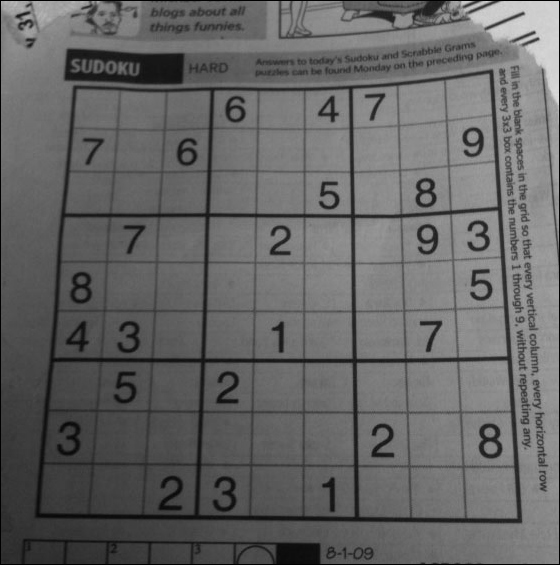

Imagen Original

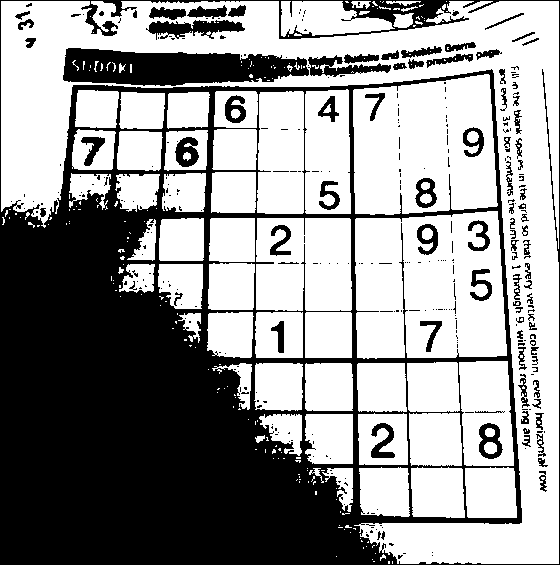

Imagen con umbral fijo

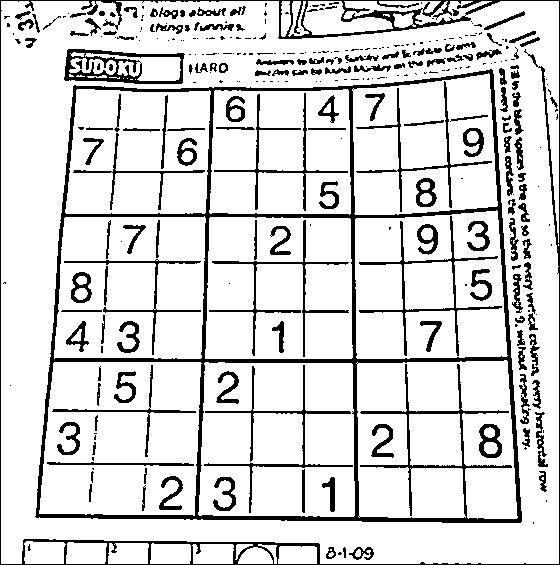

Imagen con umbral variable (y un poco de filtro de mediana para hacerla mas "nitida").

Si deseas conocer todo el proceso y un ejemplo de código, aquí esta el enlace que te comente, del portal acodigo. https://acodigo.blogspot.com/2017/08/umbralizacion-adaptativa-con-opencv.html#:~:text=La%20umbralizaci%C3%B3n%20adaptativa%20o%20variable,grises%20o%20iluminaci%C3%B3n%20no%20uniforme.

Un saludo!